# Employee-Leave-Classifier

## In this project, we will analyze the data, perform exploratory data analysis (EDA), and extract valuable insights from the features. Furthermore, we will attempt to build a predictive model that can help us determine whether employees are likely to leave the company or stay based on various independent features.

## Import libraries

In [55]:
import numpy as np                                     # linear alegbra
import pandas as pd                                    # data processing
import seaborn as sns                                  # ploting graphs
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder         # converting categorical to numerical
from sklearn.preprocessing import StandardScaler       # scaling
from sklearn.model_selection import train_test_split   # spiltting the data
from sklearn.linear_model import LogisticRegression    # model building algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV       # hyperparameter tuning
                                                       # evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings                                        # for ingore warnings
warnings.filterwarnings('ignore')

### Load and display the dataset

In [56]:
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## EDA

In [57]:
print(df.shape)
df.info()

(4653, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [58]:
df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [59]:
# To check if there are any special characters in place of values
for i in df.columns:
    print({i:df[i].unique()})

{'Education': array(['Bachelors', 'Masters', 'PHD'], dtype=object)}
{'JoiningYear': array([2017, 2013, 2014, 2016, 2015, 2012, 2018], dtype=int64)}
{'City': array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)}
{'PaymentTier': array([3, 1, 2], dtype=int64)}
{'Age': array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41], dtype=int64)}
{'Gender': array(['Male', 'Female'], dtype=object)}
{'EverBenched': array(['No', 'Yes'], dtype=object)}
{'ExperienceInCurrentDomain': array([0, 3, 2, 5, 1, 4, 7, 6], dtype=int64)}
{'LeaveOrNot': array([0, 1], dtype=int64)}


In [60]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [61]:
df.duplicated().sum()

1889

In [62]:
df.drop_duplicates(inplace=True)
print(df.shape)

(2764, 9)


##### Inference : 
1. The dataset consists of 9 fields and 4653 records.
2. The dataset does not contain null values (no missing values).
3. However, it does contain duplicate values, and all those duplicate records have been eliminated.
4. The data types include integers and objects, with objects needing to be converted into integers for further modeling.

#### Data visualization

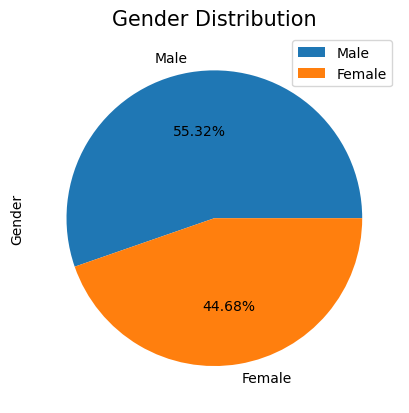

In [63]:
#DV 1: Gender distribtion by pie chart 

df.Gender.value_counts().plot.pie(startangle=0,autopct="%1.2f%%")
plt.title("Gender Distribution",fontsize=15)
plt.legend()
plt.show()

The male distribution is higher than that of females, accounting for 59.7%.

0    1676
1    1088
Name: LeaveOrNot, dtype: int64


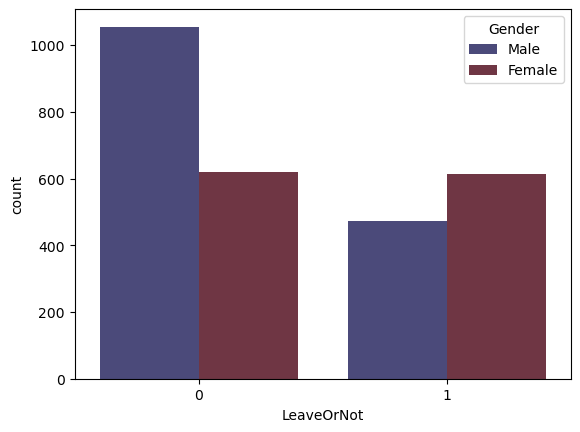

In [64]:
#DV 2: Leave or not distribution by countplot

print(df.LeaveOrNot.value_counts())
sns.countplot(data=df,x=df.LeaveOrNot,hue='Gender',palette='icefire')

plt.show()

We can observe that Class 0 has a majority of male employees, indicating a higher male retention rate, while female employees are more likely to leave the job compared to their male counterparts

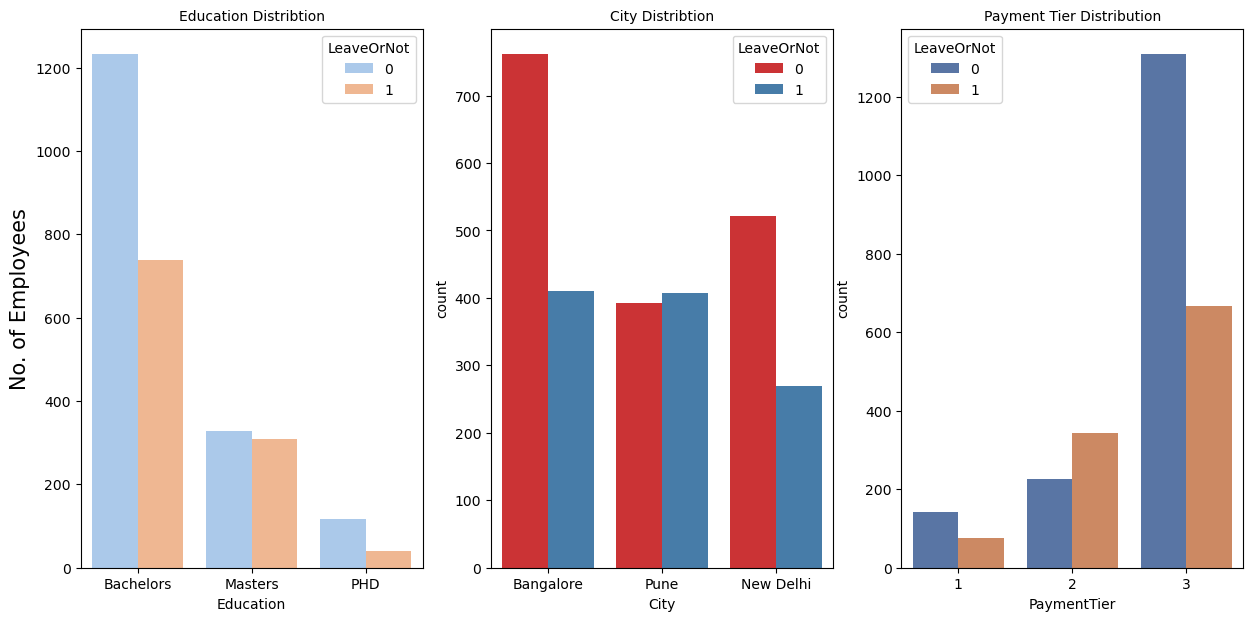

In [65]:
#DV 3: Distribtion of Education, City and Payment tiering using countplot

plt.figure(figsize=(15,7))
plt.subplot(131)
sns.countplot(data=df,x=df.Education,hue='LeaveOrNot',palette='pastel')
plt.title('Education Distribtion',size = 10)
plt.ylabel('No. of Employees',size=15)

plt.subplot(132)
sns.countplot(data=df,x=df.City,hue='LeaveOrNot',palette='Set1')
plt.title('City Distribtion',size = 10)

plt.subplot(133)
sns.countplot(data=df,x=df.PaymentTier,hue='LeaveOrNot',palette='deep')
plt.title('Payment Tier Distribution',size = 10)

plt.show()

1. The largest number of employees resides in Bangalore, belongs to Payment Tier 3, and holds a Bachelor's degree.
2. We can observe that almost half of the employees with a Master's degree tend to leave, while a larger number of employees with Bachelor's and Ph.D. degrees prefer to stay.
3. More than half of the employees residing in Pune leave their jobs, whereas employees from Bangalore and Delhi do not.
4. We can see that the attrition rate is higher for employees in the second payment tier.

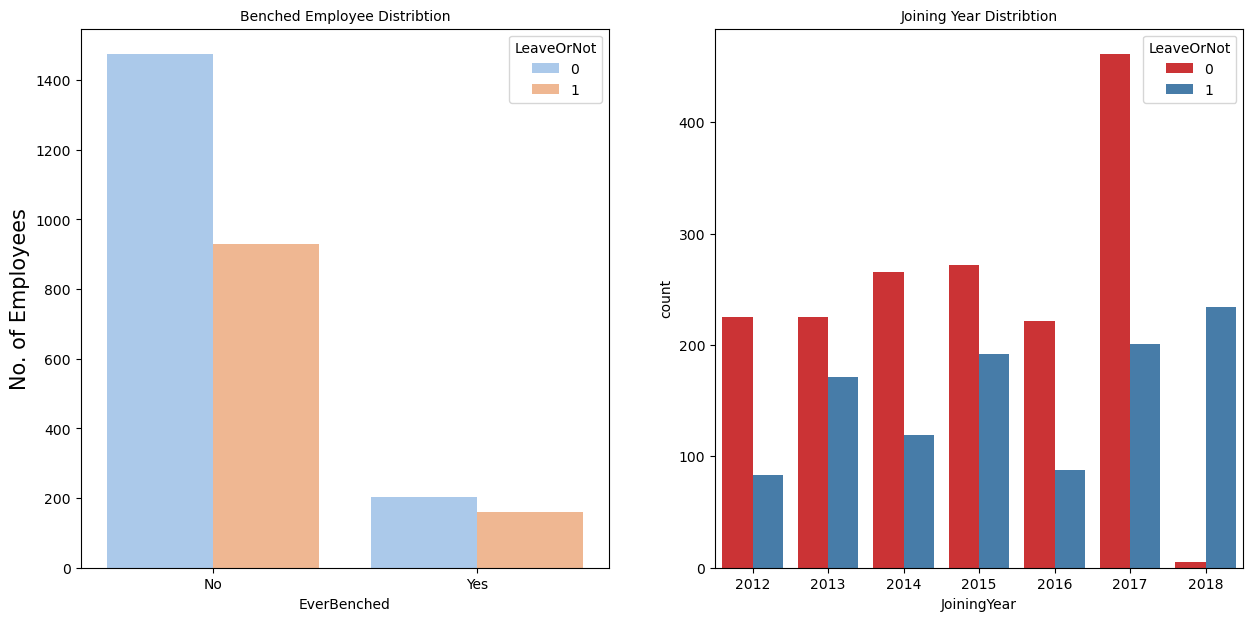

In [66]:
#DV 4: Employee Benched and Joining year distribution

plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(data=df,x=df.EverBenched,hue='LeaveOrNot',palette='pastel')
plt.title('Benched Employee Distribtion',size = 10)
plt.ylabel('No. of Employees',size=15)

plt.subplot(122)
sns.countplot(data=df,x=df.JoiningYear,hue='LeaveOrNot',palette='Set1')
plt.title('Joining Year Distribtion',size = 10)
plt.show()

1. We can clearly see that most of the employees who are benched leave the company.
2. The highest number of employees who joined was in the year 2017.
3. In 2018, the attrition rate was higher than the retention rate.

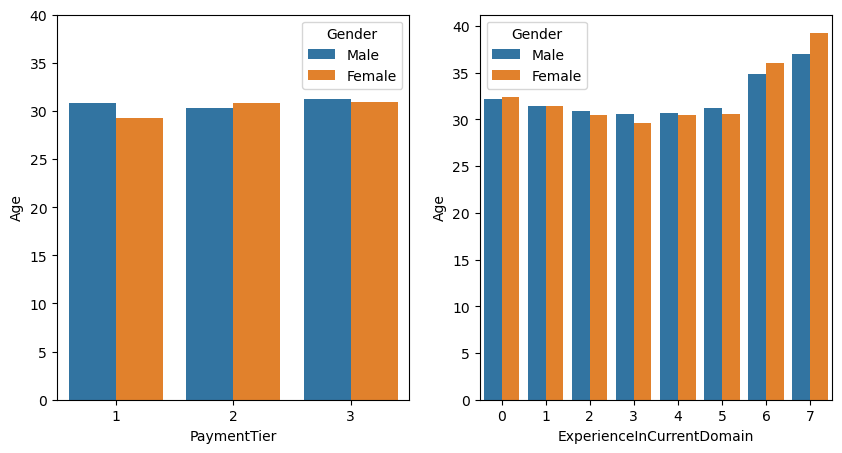

In [67]:
#DV 5: Agewise Distribution of Payment tier and Experience

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.barplot(data=df,x='PaymentTier',y='Age',hue='Gender',errorbar=None)
plt.ylim(0,40)

plt.subplot(122)
sns.barplot(data=df,x='ExperienceInCurrentDomain',y='Age',hue='Gender',errorbar=None)

plt.show()

Across all tiers, the age is almost equally distributed, with males slightly dominating in the 1st and 3rd tiers, while females dominate in the 2nd tier.<br>
In terms of experience, employees with the most experience are the oldest, with females being the majority.

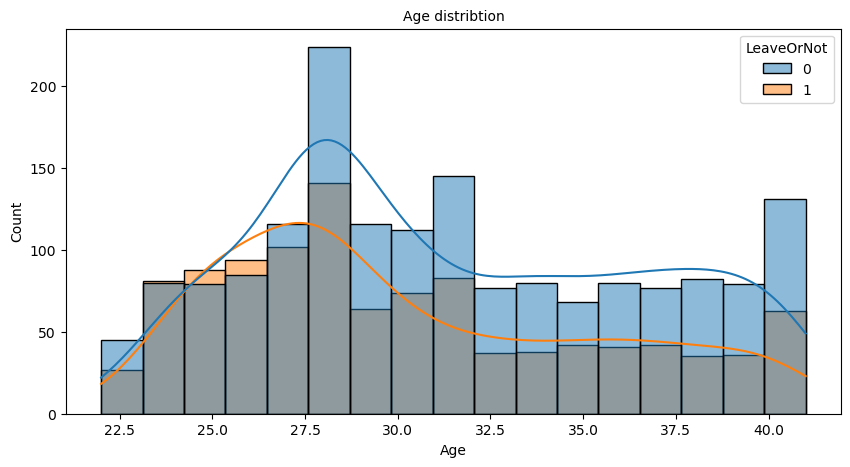

In [68]:
#DV 6: Age distribtion

plt.figure(figsize =(10,5))
sns.histplot(x=df.Age,hue=df.LeaveOrNot,kde=True)
plt.title('Age distribtion',size=10)
plt.show()

The age group ranging from 27 to 28 has the highest count of employees. <br>We can observe that the age group of 24 to 26 tends to leave the job more compared to the rest of the age groups

In [69]:
df.groupby(['City','Education'])[['PaymentTier','ExperienceInCurrentDomain']].mean().round()

PaymentTier  ExperienceInCurrentDomain
City      Education                                        
Bangalore Bachelors          3.0                        3.0
          Masters            3.0                        3.0
          PHD                3.0                        3.0
New Delhi Bachelors          3.0                        3.0
          Masters            3.0                        3.0
          PHD                3.0                        3.0
Pune      Bachelors          3.0                        3.0
          Masters            2.0                        3.0
          PHD                2.0                        2.0

For most cities and levels of education, the average value is 3 in both Tiering and Years of experience, whereas in a few cases, such as in Pune city, there are some average values of 2 to be found.

#### Converting categorical(obj) varibles to numerical(int) varibles

In [70]:
#segregate categorical variables

df_obj = []                                         # counter

for i in df:
    if df[i].dtype=="object":
        df_obj.append(i)
        
df_obj

['Education', 'City', 'Gender', 'EverBenched']

In [71]:
le=LabelEncoder()                                   # using label encoder

for x in df_obj:
    df[x]=le.fit_transform(df[x])                   # fit and transform values by label encoder

    
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


### Checking for assumption of outliers and multicollinearity

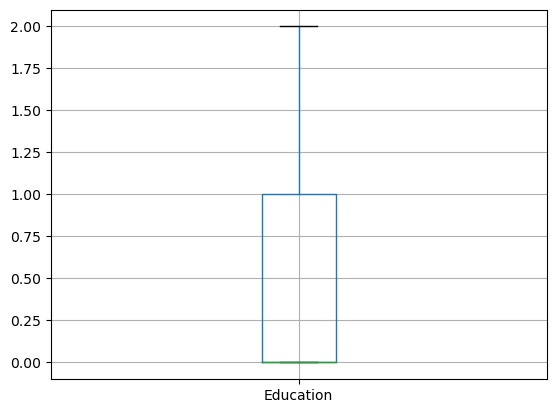

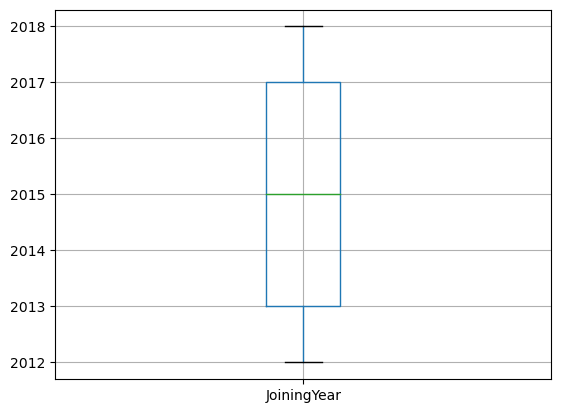

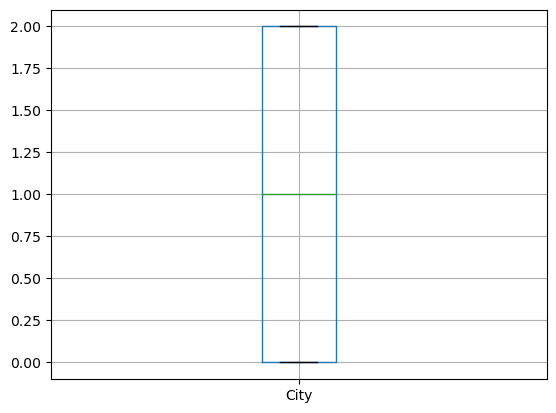

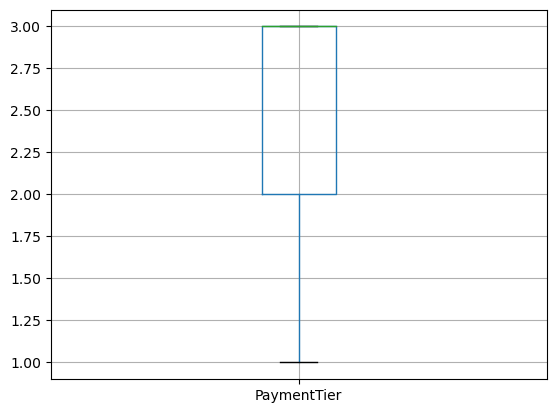

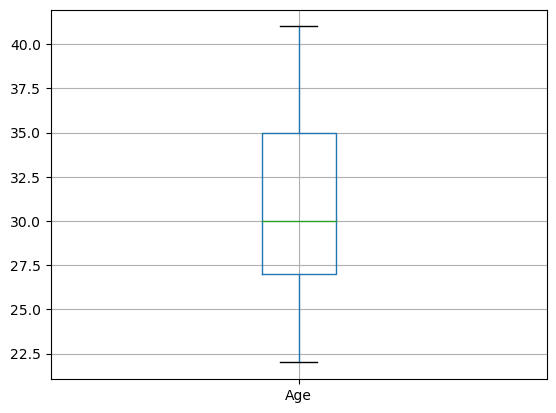

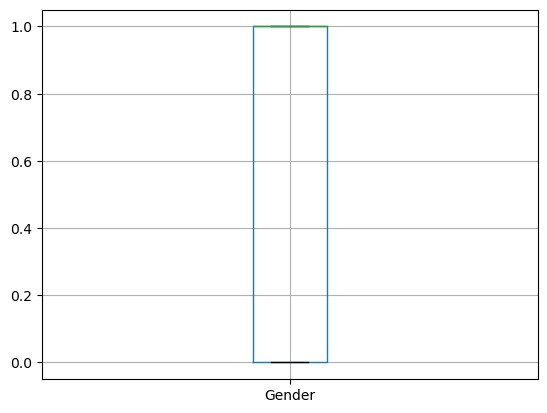

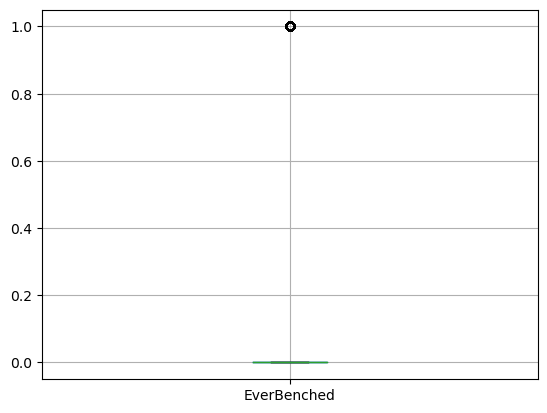

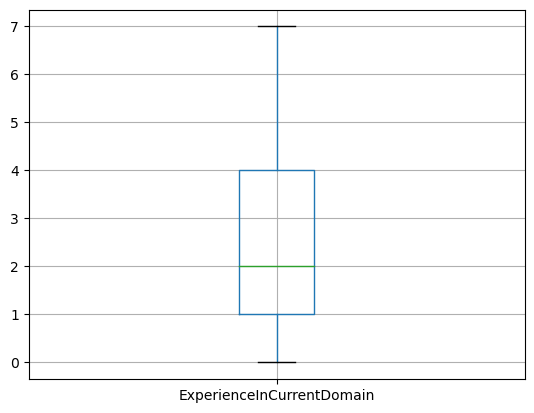

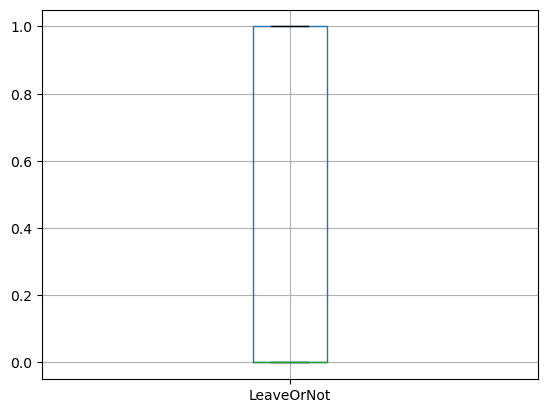

In [72]:
#Assumption 1: There should be no outliers in the data using box plot

for x in df:
    df.boxplot(column=x)
    plt.show()

                           Education  JoiningYear      City  PaymentTier  \
Education                   1.000000     0.113858  0.111153    -0.071380   
JoiningYear                 0.113858     1.000000  0.038988    -0.053823   
City                        0.111153     0.038988  1.000000    -0.209064   
PaymentTier                -0.071380    -0.053823 -0.209064     1.000000   
Age                        -0.107324     0.024445 -0.071884     0.067514   
Gender                      0.025057     0.007990 -0.098009     0.172051   
EverBenched                -0.084810     0.042903 -0.036916     0.057464   
ExperienceInCurrentDomain   0.043842    -0.031228  0.002805    -0.004602   

                                Age    Gender  EverBenched  \
Education                 -0.107324  0.025057    -0.084810   
JoiningYear                0.024445  0.007990     0.042903   
City                      -0.071884 -0.098009    -0.036916   
PaymentTier                0.067514  0.172051     0.057464   
Age  

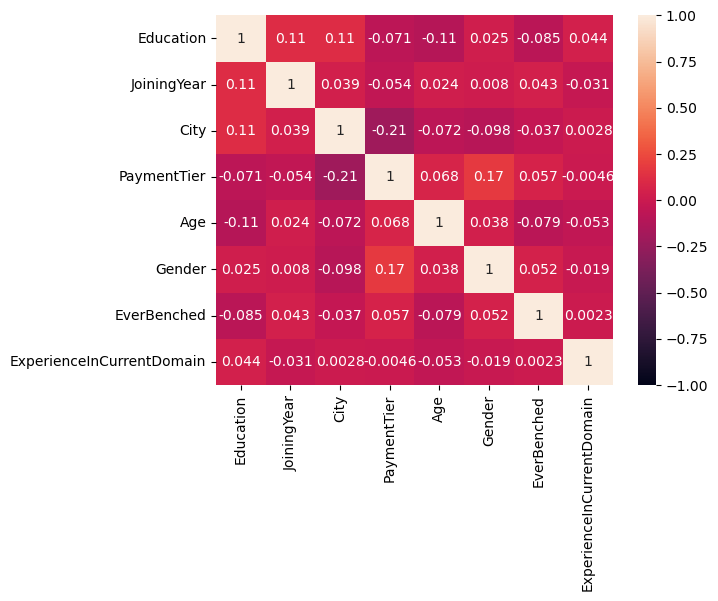

In [73]:
#Assumption of no multicolinearity: There should be no multicolinearity between the independent variables

df_ind = df.iloc[:,0:-1]                                # creating independent varibles   

corr_df = df_ind.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

##### Inference : 
There is no outliers and no multicollinearity between independent variables

#### Spiltting the data into independent and target variable.

In [74]:
df.shape

(2764, 9)

In [75]:
x=df.iloc[:,0:-1]                                      #independent variables
y=df.iloc[:,-1]                                        #Target variable

In [76]:
print(x.shape)
print(y.shape)

(2764, 8)
(2764,)


##### Scaling

In [77]:
scaler = StandardScaler()                               
scaler.fit(x)                                           #training on data
x=scaler.transform(x)                                   #transforming the data

print(x)

[[-0.59027241  1.01270119 -1.03854496 ...  0.89873103 -0.38759371
  -1.64213199]
 [-0.59027241 -1.10863726  1.35956554 ... -1.11267995 -0.38759371
   0.22085316]
 [-0.59027241 -0.57830265  0.16051029 ... -1.11267995 -0.38759371
  -0.40014189]
 ...
 [ 1.12891932 -1.10863726  1.35956554 ...  0.89873103 -0.38759371
  -0.40014189]
 [ 1.12891932  1.5430358   0.16051029 ...  0.89873103 -0.38759371
   1.46284326]
 [-0.59027241 -1.63897187 -1.03854496 ...  0.89873103  2.58002126
  -0.40014189]]


##### Building the model and spilting the data into train and test

In [78]:
#split the data into train and test

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                   random_state=77)

In [79]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("Percentage of train data",x_train.shape[0]/x.shape[0]*100)

(2211, 8)
(2211,)
(553, 8)
(553,)
Percentage of train data 79.99276410998553


Applying different algorithms to determine which one achieves the highest accuracy for modeling and, if possible, for tuning

In [80]:
# first, initialize the classificators

tree= DecisionTreeClassifier(random_state=77)                       #using the random state for reproducibility
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
svm= SVC(random_state=77)
rf=RandomForestClassifier(n_estimators=100,random_state=77)
logreg=LogisticRegression(random_state=77)

In [81]:
#create a list with the objects 
models= [tree, knn, svm, rf, logreg]

for model in models:
    model.fit(x_train, y_train)                                     # fit the model
    y_pred= model.predict(x_test)                                   # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) 
    clf_report= classification_report(y_test, y_pred)
    print(type(model).__name__,":")
    print(confusion_matrix(y_test,y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

DecisionTreeClassifier :
[[258  70]
 [ 92 133]]
The accuracy of the  DecisionTreeClassifier  model is  70.70524412296564
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       328
           1       0.66      0.59      0.62       225

    accuracy                           0.71       553
   macro avg       0.70      0.69      0.69       553
weighted avg       0.70      0.71      0.70       553



KNeighborsClassifier :
[[293  35]
 [104 121]]
The accuracy of the  KNeighborsClassifier  model is  74.86437613019892
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       328
           1       0.78      0.54      0.64       225

    accuracy                           0.75       553
   macro avg       0.76      0.72      0.72       553
weighted avg       0.75      0.75      0.74       553



SVC :
[[313  15]
 [ 96 129]]
The accuracy of the  SVC  m

##### Inferences :
1. Among the models used, SVC has achieved the highest accuracy, with achieving 79.92%.
2. Additionally, we can infer that the lower accuracy of these models may be attributed to the low recall for class 1,  possibly due to the relatively less amount of data in class 1 when compared to class 2.
3. Hence, we can use SMOTE to address the imbalance in the data and evaluate whether it leads to improvements in recall and accuracy. 
4. We will proceed with fine-tuning the SVC model to explore its potential for further improvement.

#### SMOTE
Synthetic minority oversampling Technique. This technique allows us to upsample the minority class observation to reach the level of majority class by creating synthetic samples similar to existing samples

In [82]:
df.LeaveOrNot.value_counts()

0    1676
1    1088
Name: LeaveOrNot, dtype: int64

In [83]:
X = df.values[:,:-1]
Y = df.values[:,-1]
print(X.shape)
print(Y.shape)

(2764, 8)
(2764,)


In [84]:
#scaling
scaler.fit(X)
X = scaler.transform(X)

In [85]:
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)

In [86]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 77,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  862
Before OverSampling, counts of label '0':  1349
After OverSampling, the shape of train_X:  (2698, 8)
After OverSampling, the shape of train_y:  (2698,)
After OverSampling, counts of label '1':  1349
After OverSampling, counts of label '0':  1349


In [87]:
#bulding models aginw with smote

for model in models:
    model.fit(X_train, Y_train)                                     # fit the model
    Y_pred= model.predict(X_test)                                   # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred)
    print(type(model).__name__,":")
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

DecisionTreeClassifier :
[[243  84]
 [ 80 146]]
The accuracy of the  DecisionTreeClassifier  model is  70.34358047016275
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       327
           1       0.63      0.65      0.64       226

    accuracy                           0.70       553
   macro avg       0.69      0.69      0.69       553
weighted avg       0.70      0.70      0.70       553



KNeighborsClassifier :
[[273  54]
 [107 119]]
The accuracy of the  KNeighborsClassifier  model is  70.88607594936708
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       327
           1       0.69      0.53      0.60       226

    accuracy                           0.71       553
   macro avg       0.70      0.68      0.68       553
weighted avg       0.71      0.71      0.70       553



SVC :
[[297  30]
 [ 91 135]]
The accuracy of the  SVC  m

With the SMOTE optimization technique, the recall of the minority class has increased slightly, but the overall model accuracy is decreasing more in comparison to the increase in recall. Hence, we will attempt to tune the hyperparameters of the SVC model using the GridSearchCV technique, excluding the SMOTE samples

###### Hyperparameter Tuinig using GridSearchCV.<br>

GridSearchCV is a hyperparameter tuning technique in machine learning used to systematically search and select the best combination of hyperparameters for a model

In [38]:
svm= SVC(random_state=77)
parameter_space = {
    'kernel': ['rbf', 'sigmoid'],                                      # Various kernel options
    'gamma': [0.001, 0.01, 0.1, 0.5],                                  # various gamma options
    'C': [10, 50, 100, 150]                                            # varoius C options
}

svm_ht = GridSearchCV(svm, parameter_space, n_jobs=-1, cv=5)

In [39]:
svm_ht.fit(x_train,y_train)                                            # training on the data to find best parameters

GridSearchCV(cv=5, estimator=SVC(random_state=77), n_jobs=-1,
             param_grid={'C': [10, 50, 100, 150],
                         'gamma': [0.001, 0.01, 0.1, 0.5],
                         'kernel': ['rbf', 'sigmoid']})

In [40]:
print('Best Paramter found:\n',svm_ht.best_params_)                    #best parameters
print(svm_ht.best_score_)                                              #accuracy of the best params using the 5-fold CV

Best Paramter found:
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.8019059681521506


The accuracy of the tuned SVC using  GridSearchCV  model is  79.92766726943941 

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       328
           1       0.89      0.58      0.70       225

    accuracy                           0.80       553
   macro avg       0.83      0.77      0.78       553
weighted avg       0.82      0.80      0.79       553



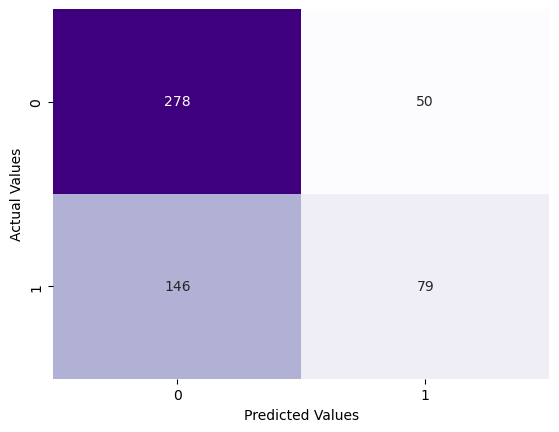

In [52]:
y_pred_ht= svm_ht.predict(x_test)                               
accuracy= accuracy_score(y_test, y_pred_ht) 
clf_report= classification_report(y_test, y_pred_ht)

print("The accuracy of the tuned SVC using ",type(svm_ht).__name__, " model is ", accuracy*100, "\n")
print("Classification report:\n", clf_report)

cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm,annot=True, cbar=False,cmap='Purples', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

We can observe that even after tuning our model, there is no increase in accuracy, and the recall of class 1 remains low. <br>
Therefore, after all optimization and tuning techniques, the best model we can select is the tuned SVC with an accuracy of 79.92%, which should be used for predictions on real test data.